## Project Name: Lending Club Case Study

<strong>General Information:</strong>
<li>Lending club case study is analysis of various factors on loan repayment. The insights of this analysis will help banks to identify if a person is likely to replay loan or not.</li>

<li>The idea behind implementing this project is to underatand how real business problems are solved using EDA. Apart from applying EDA techniques, we also learnt about risk analytics in banking and financial services.</li>

<li>Lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). Credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.</li>

<li>Loan data set contains the complete loan data for all loans issued through the time period 2007 to 2011.</li>

<strong>Group Facilitator:</strong><br />Name: Narendra Jha<br />
                           Email ID: narendra.jha@live.com<br />
                           Phone no:  9990227116              
                           
<strong>Team Member Detail:</strong><br />Name: Mohammad Monis<br />
                                Email ID: javedmonis07@gmail.com<br />
                                Phone no: 9642234275

In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing loan data into 'loan_data' dataframe
loan_data = pd.read_csv("loan.csv", low_memory=False)
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
# Check data info
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [4]:
# Check data type of all the columns
loan_data.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

In [5]:
# Check NA values in all columns
loan_data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [6]:
# Check NA values % in all columns
(loan_data.isnull().sum()/(len(loan_data)))*100

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

In [7]:
# Remove all columns which has only NA value
loan_data=loan_data.dropna(axis=1,how='all')

In [8]:
# Get the number of unique values in each column
unique_values = loan_data.nunique()
unique_values

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
desc                          26527
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths              

In [9]:
# Get the constant columns
constant_columns = unique_values[unique_values == 1].index.tolist()
constant_columns

['pymnt_plan',
 'initial_list_status',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'tax_liens']

In [10]:
# Removing the constant columns as these are going to help in analysis
loan_data = loan_data.drop(constant_columns, axis=1)

In [11]:
# Removing the id, member_id and url columns as they have unique values only and which is not going to help in analysis
loan_data = loan_data.drop(['id','member_id','url'], axis = 1)

In [12]:
# Getting unique values in 'loan_status' column
loan_data['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [13]:
# Creating a new column 'has_defaulted' which is 0 if loan is fully paid or current else 1 if charged off
loan_data['has_defaulted'] = loan_data['loan_status'].apply(lambda x: 1 if x=='Charged Off' else 0)

In [14]:
# Read the 'loan_status' column
loan_data['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [15]:
# Create new data set and store only 'Charged Off' data
charged_off_data = loan_data[loan_data['loan_status']=="Charged Off"]

In [16]:
# Check unique value of 'int_rate'
loan_data['int_rate']

0        10.65%
1        15.27%
2        15.96%
3        13.49%
4        12.69%
          ...  
39712     8.07%
39713    10.28%
39714     8.07%
39715     7.43%
39716    13.75%
Name: int_rate, Length: 39717, dtype: object

In [17]:
# Replace % sign from column 'int_rate' so that we can convert as float for further analysis
loan_data['int_rate'] = loan_data['int_rate'].str.replace('%','')

In [18]:
#  Convert all continuous variables to numeric values
numeric_columns = ['loan_amnt','funded_amnt','funded_amnt_inv','installment','int_rate','annual_inc','dti']
loan_data[numeric_columns] = loan_data[numeric_columns].apply(pd.to_numeric)

In [19]:
# Read column 'emp_length' and check unique value
loan_data['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [20]:
# Replace 'emp_length' NA with 0
loan_data['emp_length'].fillna('0',inplace=True)

In [21]:
# Read the column Loan 'purpose'
loan_data['purpose'].unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

In [22]:
# Find total % of each 'purpose'
(loan_data['purpose'].value_counts()*100)/len(loan_data)

debt_consolidation    46.934562
credit_card           12.916383
other                 10.053629
home_improvement       7.493013
major_purchase         5.506458
small_business         4.602563
car                    3.900093
wedding                2.384369
medical                1.744845
moving                 1.467885
vacation               0.959287
house                  0.959287
educational            0.818289
renewable_energy       0.259335
Name: purpose, dtype: float64

In [23]:
# Deleting 'other' as it is not sure what it contais actually and how it will help in analysis
loan_data = loan_data[loan_data['purpose']!="other"]

In [24]:
# Converting this column as datetime
loan_data['issue_d']  =  pd.to_datetime(loan_data['issue_d'], format='%b-%y')

In [25]:
# Creating separate colummns for loan issue month and year
loan_data["issue_year"] = loan_data['issue_d'].dt.year
loan_data["issue_month"] = loan_data['issue_d'].dt.month

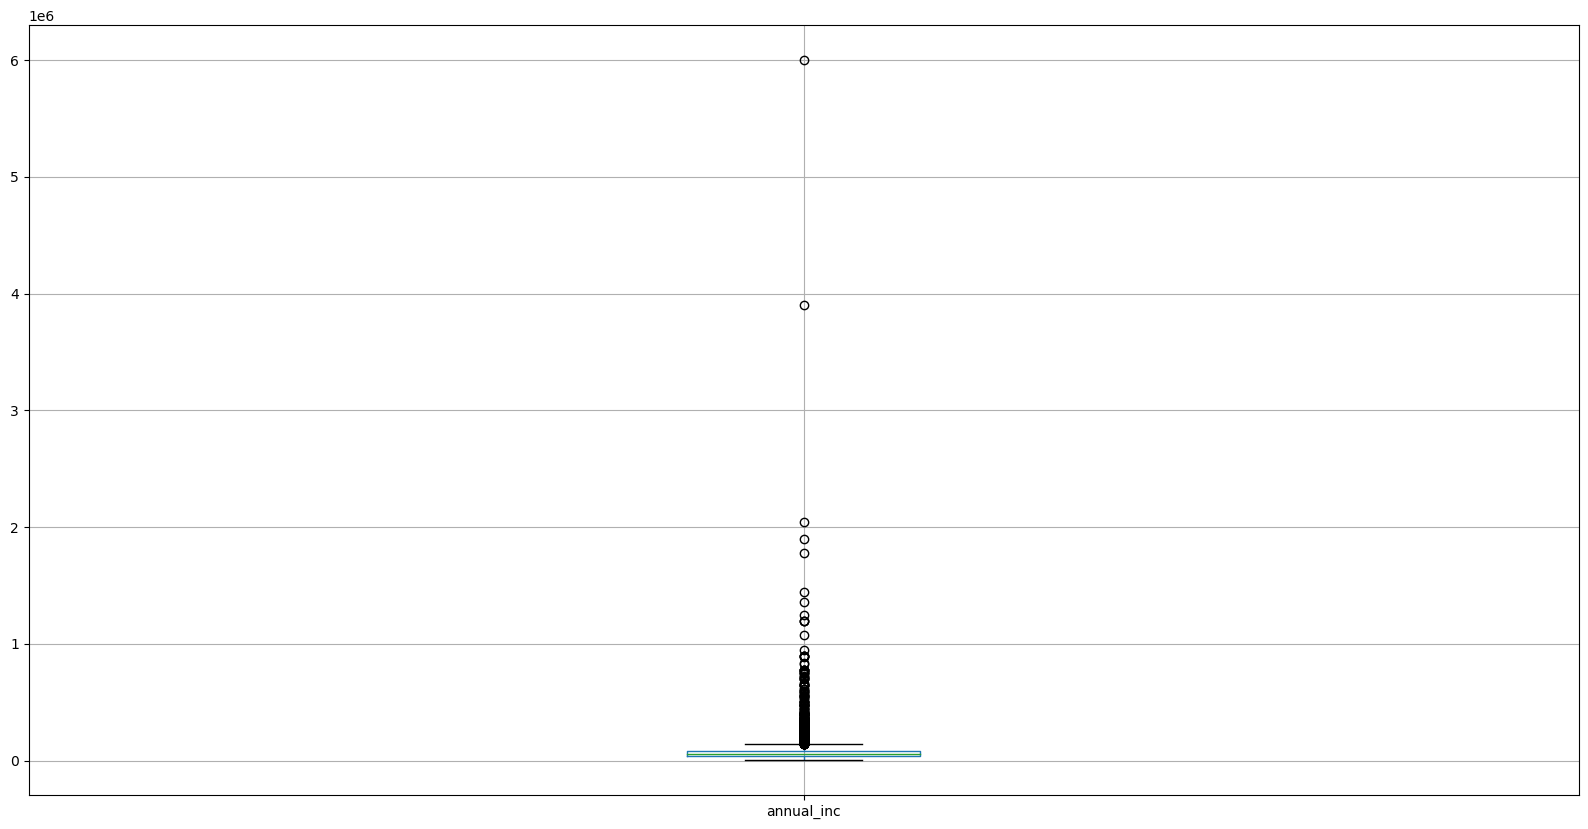

In [26]:
# Analyzing distribution of annual_inc column using box plot
loan_data.boxplot('annual_inc', figsize=(20,10))
plt.show()

In [80]:
# Plot to show the frequency of loan Status
fig = px.pie(loan_data,names='loan_status', title='Loan Status',hole=0)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

<strong>Analysis Result:</strong> The chart above shows that <strong>83.1%</strong> individuals have successfully repaid their loans, <strong>2.76%</strong> are current loans and <strong>14.2%</strong> loans have been declared as charged off.

In [28]:
# As seen in above figure, there are huge numbers of outliers in annual_inc column
# Removing outliers from data set using formula IQR*1.5 + Q3 to detect outliers
(loan_data['annual_inc'].quantile(0.75)-loan_data['annual_inc'].quantile(0.25)) * 1.5 + loan_data['annual_inc'].quantile(0.75)

145256.25

In [29]:
# Removing 'annual_inc' beyond 130500.0 as they are outliers
loan_data = loan_data[loan_data['annual_inc'] < 145144.0]

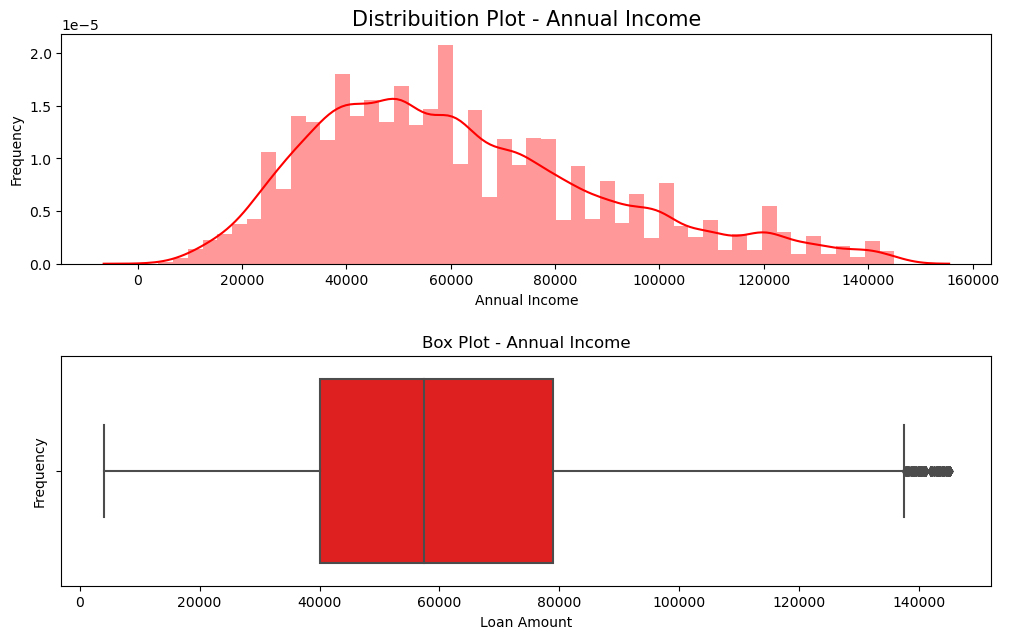

In [30]:
# Plot the 'annual_inc' once again after removing the outliers
fig, ax = plt.subplots(nrows=2, figsize=(12,8))
plt.subplots_adjust(hspace = 0.4, top = 0.8)

# Distribuition Plot - Annual Income
annual_inc_distplot = sns.distplot(loan_data['annual_inc'], ax=ax[0], color='r')
annual_inc_distplot.set_title("Distribuition Plot - Annual Income", fontsize=15)
annual_inc_distplot.set_xlabel("Annual Income")
annual_inc_distplot.set_ylabel("Frequency")

# Box Plot - Annual Income
annual_inc_boxplot = sns.boxplot(data =loan_data, x=loan_data['annual_inc'],ax=ax[1],orient='v',color='r')
annual_inc_boxplot.set_title("Box Plot - Annual Income")
annual_inc_boxplot.set_xlabel("Loan Amount")
annual_inc_boxplot.set_ylabel("Frequency")

plt.show()

<strong>Analysis Result:</strong> The above chart indicates that the majority of loans fall within the income range of <strong>40000 to 80000</strong>.

=====================================================================================================================

In [31]:
# Creating a new column 'income_range' to place annual income in ranges 
loan_data['income_range'] = pd.cut(loan_data['annual_inc'], bins = 8, labels = ['less than 20k', '20k-40k', '40k-60k', '60k-80k', '80k-100k', '100k-120k', '120k-140k', 'above 140k'])

In [32]:
# Check top 5 result after adding new column 'income_range'
loan_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies,has_defaulted,issue_year,issue_month,income_range
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,...,0.00,Jan-15,171.62,NaN,May-16,0.0,0,2011,12,20k-40k
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,...,1.11,Apr-13,119.66,NaN,Sep-13,0.0,1,2011,12,20k-40k
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,...,0.00,Jun-14,649.91,NaN,May-16,0.0,0,2011,12,less than 20k
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,...,0.00,Jan-15,161.03,NaN,Jan-16,0.0,0,2011,12,20k-40k
6,7000,7000,7000.0,60 months,15.96,170.08,C,C5,Southern Star Photography,8 years,...,0.00,May-16,1313.76,NaN,May-16,0.0,0,2011,12,40k-60k


In [33]:
# Affect of annual income on default rate
default_rate_by_annual_income = loan_data.groupby('income_range').agg({'has_defaulted': [np.mean]})
default_rate_by_annual_income.head()

,has_defaulted
,mean
income_range,
less than 20k,0.188538
20k-40k,0.173620
40k-60k,0.146823
60k-80k,0.139174
80k-100k,0.124846


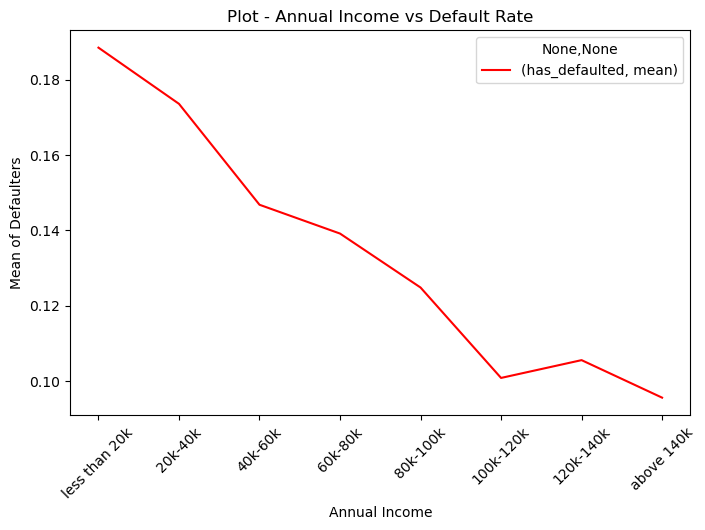

In [34]:
# Plot annual income on default rate
default_rate_by_annual_income_plot=default_rate_by_annual_income.plot(kind='line', figsize=(8, 5), rot=45,color='r')
default_rate_by_annual_income_plot.set_title("Plot - Annual Income vs Default Rate")
default_rate_by_annual_income_plot.set_xlabel("Annual Income")
default_rate_by_annual_income_plot.set_ylabel("Mean of Defaulters")
plt.show()

<strong>Analysis Result:</strong> The chart above indicates that as income rises, the rate of loan defaults decreases.
<br /><br />
<strong>Recommendation:</strong> This analysis indicates that lending to individuals with a stable annual income is safer than extending loans to those with lower income levels.

=====================================================================================================================

In [35]:
# Read column loan 'term' and analysis it
loan_data['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [36]:
# Create new dataset object for default rate by term
default_rate_by_term = loan_data.groupby('term').agg({'has_defaulted': ['mean']})
default_rate_by_term.head()

,has_defaulted
,mean
term,
36 months,0.109570
60 months,0.227922


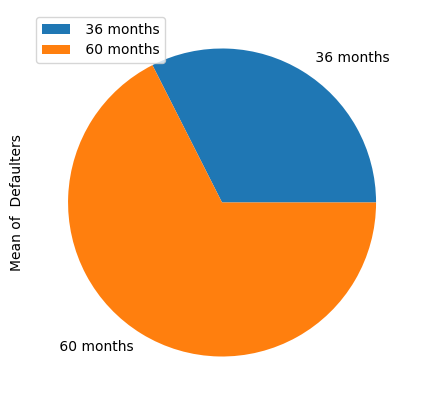

In [37]:
#Plotting pie chart for loan term
default_rate_by_term_plot = default_rate_by_term.plot(kind='pie', y='has_defaulted',figsize=(8, 5))
default_rate_by_term_plot.set_ylabel("Mean of  Defaulters")
plt.show()

<strong>Analysis Result:</strong>  The above chart shows that a significant portion of defaulters opted for a <strong>60 months</strong> loan term.
<br /><br />
<strong>Recommendation:</strong> It is safe to give loan for short period than for long period.

=====================================================================================================================

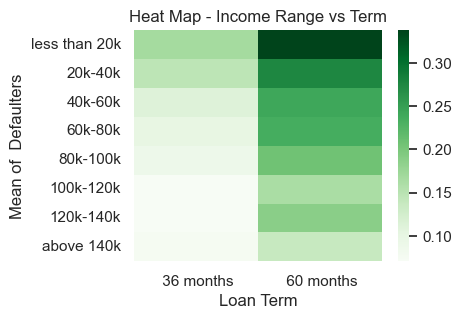

In [148]:
# Plot heat map to see Income Range vs Term for default 
income_range_vs_term = pd.pivot_table(loan_data, values = 'has_defaulted' , index=['income_range'],columns = ['term'], aggfunc=np.mean)
income_range_vs_term_heatmap = sns.heatmap(income_range_vs_term, cmap='Greens')
income_range_vs_term_heatmap.set_title("Heat Map - Income Range vs Term")
income_range_vs_term_heatmap.set_xlabel("Loan Term")
income_range_vs_term_heatmap.set_ylabel("Mean of  Defaulters")
plt.show()

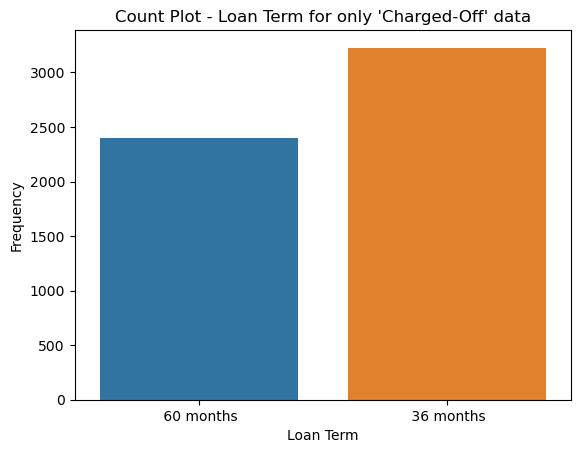

In [38]:
# Plot to show the frequency of loan term when considered only 'Charged-Off' data
term_countplot = sns.countplot(charged_off_data, x="term")
term_countplot.set_title("Count Plot - Loan Term for only 'Charged-Off' data")
term_countplot.set_xlabel("Loan Term")
term_countplot.set_ylabel("Frequency")
plt.show()

<strong>Analysis Result:</strong> But when we studied only 'Charged-Off' data then found that a significant portion of defaulters opted for a <strong>36 months</strong> loan term.
<br /><br />
<strong>Recommendation:</strong> It is safe to give loan for long period than for long period.

=====================================================================================================================

In [39]:
# Analyzing default rate on basis of home ownership
loan_data['home_ownership'].value_counts()

RENT        16388
MORTGAGE    15001
OWN          2576
OTHER          80
NONE            1
Name: home_ownership, dtype: int64

In [40]:
# Removing data with home ownership as NONE
loan_data = loan_data[loan_data['home_ownership'] != 'NONE']
loan_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies,has_defaulted,issue_year,issue_month,income_range
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,...,0.00,Jan-15,171.62,NaN,May-16,0.0,0,2011,12,20k-40k
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,...,1.11,Apr-13,119.66,NaN,Sep-13,0.0,1,2011,12,20k-40k
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,...,0.00,Jun-14,649.91,NaN,May-16,0.0,0,2011,12,less than 20k
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,...,0.00,Jan-15,161.03,NaN,Jan-16,0.0,0,2011,12,20k-40k
6,7000,7000,7000.0,60 months,15.96,170.08,C,C5,Southern Star Photography,8 years,...,0.00,May-16,1313.76,NaN,May-16,0.0,0,2011,12,40k-60k


In [41]:
# Grouping home ownership and calculating mean of defaulters
default_rate_by_home_ownership = loan_data.groupby('home_ownership').agg({'has_defaulted': [np.mean]})
default_rate_by_home_ownership.head()

,has_defaulted
,mean
home_ownership,
MORTGAGE,0.135391
OTHER,0.187500
OWN,0.146351
RENT,0.146510


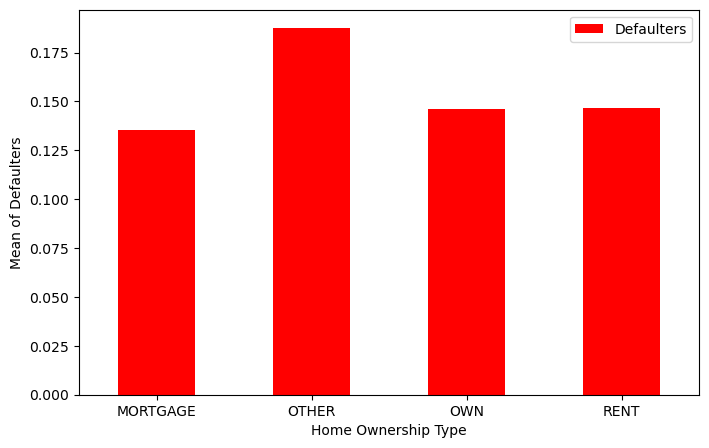

In [42]:
# Plot Home Ownership Type to see Default rate by Home Ownership
default_rate_by_home_ownership_plot = default_rate_by_home_ownership.plot(kind='bar', figsize=(8, 5), rot=0,color='r')
default_rate_by_home_ownership_plot.set_xlabel("Home Ownership Type") 
default_rate_by_home_ownership_plot.set_ylabel("Mean of Defaulters")
plt.legend().get_texts()[0].set_text('Defaulters')
plt.show()

<strong>Analysis Result:</strong> There is no evident connection between owning a home and the rate of defaults on loans.
<br /><br />
<strong>Recommendation:</strong>The rate of default is not significantly influenced by homeownership status; therefore, it should not be regarded as a crucial factor when approving loans.

=====================================================================================================================

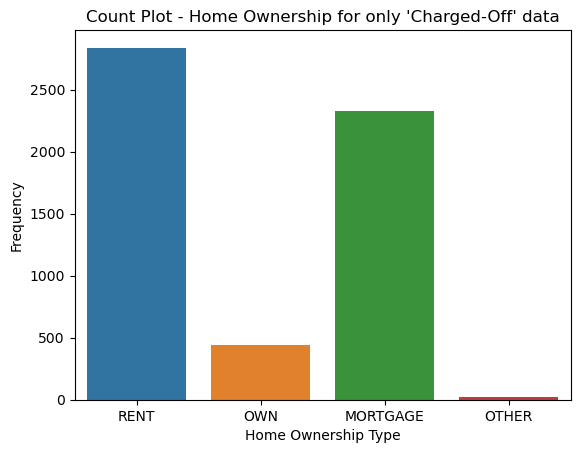

In [43]:
# Plot to show the frequency of Home Ownership when considered only 'Charged-Off' data
home_ownership_countplot = sns.countplot(charged_off_data, x="home_ownership")
home_ownership_countplot.set_title("Count Plot - Home Ownership for only 'Charged-Off' data")
home_ownership_countplot.set_xlabel("Home Ownership Type")
home_ownership_countplot.set_ylabel("Frequency")
plt.show()

<strong>Analysis Result:</strong> But when we studied only 'Charged-Off' data then found that a significant portion of individuals who have defaulted on their payments reside in <strong>rented</strong> accommodations.
<br /><br />
<strong>Recommendation:</strong> Banks need to exercise caution when granting loans to individuals residing in rented accommodations.

=====================================================================================================================

In [150]:
#Study combined effect of home ownership and income range on default percent
income_range_vs_ownership = pd.pivot_table(loan_data, values = 'has_defaulted' , index=['income_range'],columns = ['home_ownership'], aggfunc=np.mean)
income_range_vs_ownership.head(40)

home_ownership,MORTGAGE,OTHER,OWN,RENT
income_range,,,,
less than 20k,0.175926,0.000000,0.165854,0.196167
20k-40k,0.173565,0.294118,0.156206,0.176201
40k-60k,0.155326,0.076923,0.154712,0.139980
60k-80k,0.140755,0.272727,0.138498,0.136536
80k-100k,0.128417,0.153846,0.125954,0.119035
100k-120k,0.098633,0.142857,0.100000,0.105951
120k-140k,0.098007,0.000000,0.130952,0.121681
above 140k,0.097978,0.000000,0.117647,0.083721


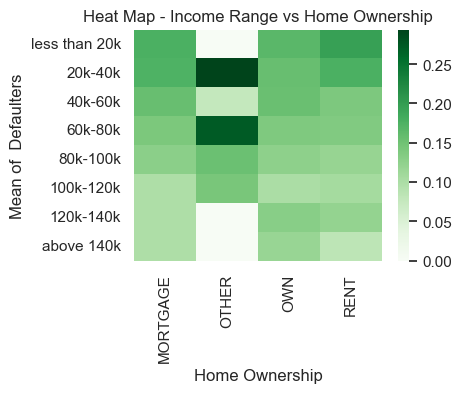

In [152]:
# plotting heatmap for above pivot table
income_range_vs_ownership_heatmap = sns.heatmap(income_range_vs_ownership, cmap='Greens')
income_range_vs_ownership_heatmap.set_title("Heat Map - Income Range vs Home Ownership")
income_range_vs_ownership_heatmap.set_xlabel("Home Ownership")
income_range_vs_ownership_heatmap.set_ylabel("Mean of  Defaulters")
plt.show()

In [44]:
# Reading 'int_rate' and analysis it
loan_data['int_rate'].head()

0    10.65
1    15.27
2    15.96
5     7.90
6    15.96
Name: int_rate, dtype: float64

In [45]:
# Putting 'int_rate' to income ratio in buckets
loan_data['int_rate_range'] = pd.cut(loan_data['int_rate'], bins = 4, labels = ['5-10', '10-15', '15-20', '20+'])
loan_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies,has_defaulted,issue_year,issue_month,income_range,int_rate_range
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,...,Jan-15,171.62,NaN,May-16,0.0,0,2011,12,20k-40k,10-15
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,...,Apr-13,119.66,NaN,Sep-13,0.0,1,2011,12,20k-40k,15-20
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,...,Jun-14,649.91,NaN,May-16,0.0,0,2011,12,less than 20k,15-20
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,...,Jan-15,161.03,NaN,Jan-16,0.0,0,2011,12,20k-40k,5-10
6,7000,7000,7000.0,60 months,15.96,170.08,C,C5,Southern Star Photography,8 years,...,May-16,1313.76,NaN,May-16,0.0,0,2011,12,40k-60k,15-20


In [46]:
# Grouping int_rate_range and calculating mean of defaulters
default_rate_by_int_rate_range = loan_data.groupby('int_rate_range').agg({'has_defaulted': [np.mean]})
default_rate_by_int_rate_range.head()

,has_defaulted
,mean
int_rate_range,
5-10,0.065450
10-15,0.145401
15-20,0.226258
20+,0.351469


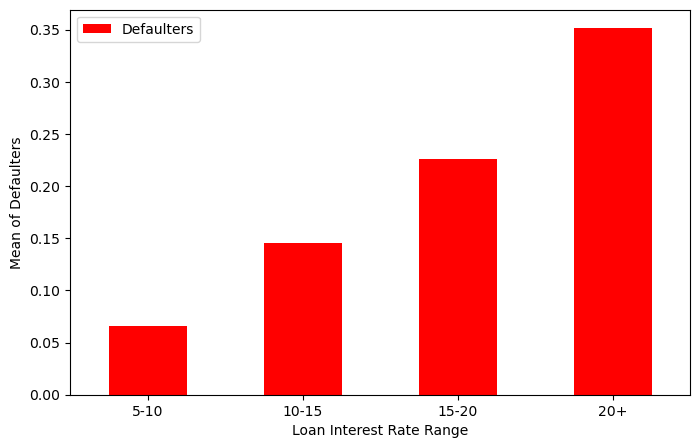

In [47]:
# Plot Interest Rate to see Default rate by Interest Rate
default_rate_by_int_rate_range_plot = default_rate_by_int_rate_range.plot(kind='bar', figsize=(8, 5), rot=0,color='r')
default_rate_by_int_rate_range_plot.set_xlabel("Loan Interest Rate Range")
default_rate_by_int_rate_range_plot.set_ylabel("Mean of Defaulters")
plt.legend().get_texts()[0].set_text('Defaulters')
plt.show()

<strong>Analysis Result:</strong> The default rate is directly related to the interest rate. In other words, most individuals who failed to repay their loans had borrowed money at interest rates exceeding 20%.
<br /><br />
<strong>Recommendation:</strong> Providing loans at lower interest rates is safer than offering loans at higher interest rates.

=====================================================================================================================

In [48]:
# Create new data set and store only 'Charged Off' data
charged_off_data = loan_data[loan_data['loan_status']=="Charged Off"]

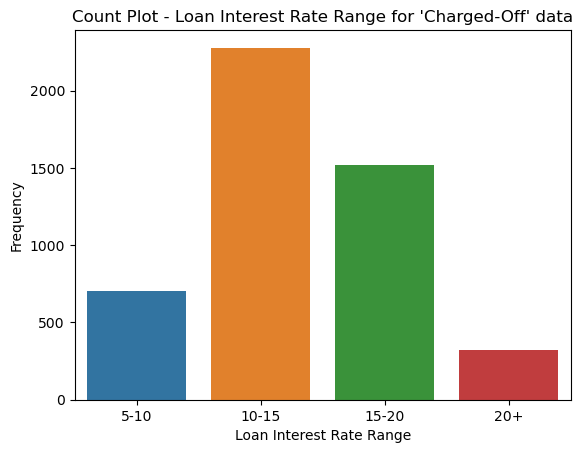

In [49]:
# Plot to show the frequency of loan int_rate_range only for 'Charged-Off' data
int_rate_range_countplot = sns.countplot(charged_off_data, x="int_rate_range")
int_rate_range_countplot.set_title("Count Plot - Loan Interest Rate Range for 'Charged-Off' data")
int_rate_range_countplot.set_xlabel("Loan Interest Rate Range")
int_rate_range_countplot.set_ylabel("Frequency")
plt.show()

<strong>Analysis Result:</strong> However, upon analyzing exclusively the 'Charged-Off' data, we discovered that a notable number of people who failed to meet their payment obligations had taken out loans with a ratio ranging from <strong>10-15%</strong>.
<br /><br />
<strong>Recommendation:</strong> Offering loans at both lower and higher interest rates is more secure than providing loans at moderate interest rates.

=====================================================================================================================

In [50]:
# Reading 'installment' and analysis it
loan_data['installment'].head()

0    162.87
1     59.83
2     84.33
5    156.46
6    170.08
Name: installment, dtype: float64

In [51]:
# Putting 'installment' in buckets
loan_data['installment_range'] = pd.cut(loan_data['installment'], bins = 5, labels = ['100-250', '250-500', '500-750', '750-1000', '1000+'])
loan_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies,has_defaulted,issue_year,issue_month,income_range,int_rate_range,installment_range
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,...,171.62,NaN,May-16,0.0,0,2011,12,20k-40k,10-15,100-250
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,...,119.66,NaN,Sep-13,0.0,1,2011,12,20k-40k,15-20,100-250
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,...,649.91,NaN,May-16,0.0,0,2011,12,less than 20k,15-20,100-250
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,...,161.03,NaN,Jan-16,0.0,0,2011,12,20k-40k,5-10,100-250
6,7000,7000,7000.0,60 months,15.96,170.08,C,C5,Southern Star Photography,8 years,...,1313.76,NaN,May-16,0.0,0,2011,12,40k-60k,15-20,100-250


In [52]:
# Grouping installment range and calculating mean of defaulters
default_rate_by_installment_range = loan_data.groupby('installment_range').agg({'has_defaulted': [np.mean]})
default_rate_by_installment_range.head()

,has_defaulted
,mean
installment_range,
100-250,0.130897
250-500,0.146079
500-750,0.160145
750-1000,0.190104
1000+,0.122137


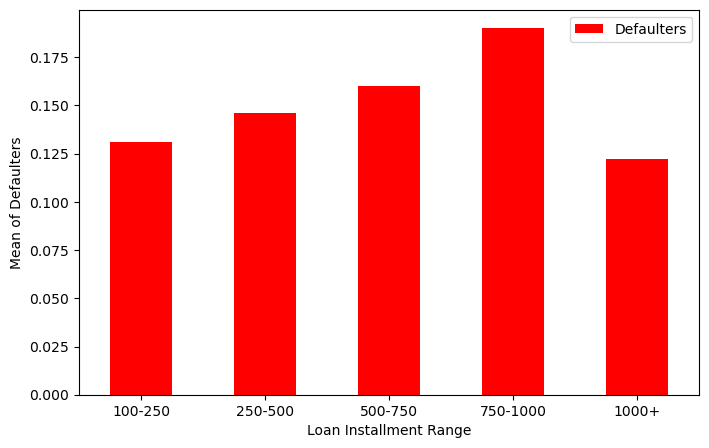

In [53]:
# Plot Installment to see Default rate by Installment
default_rate_by_installment_range_plot = default_rate_by_installment_range.plot(kind='bar', figsize=(8, 5), rot=0,color='r')
default_rate_by_installment_range_plot.set_xlabel("Loan Installment Range")
default_rate_by_installment_range_plot.set_ylabel("Mean of Defaulters")
plt.legend().get_texts()[0].set_text('Defaulters')
plt.show()

<strong>Analysis Result:</strong> Loans with installment amounts between <strong>500 and 750</strong> exhibit the highest rate of defaults. However, this information doesn't provide any useful insights on whether to approve or deny a loan application.

=====================================================================================================================

In [54]:
# Reading 'Loan Purpose' and analysis it
loan_data['purpose'].head()

0           credit_card
1                   car
2        small_business
5               wedding
6    debt_consolidation
Name: purpose, dtype: object

In [55]:
# Grouping Loan Purpose and calculating mean of defaulters
default_rate_by_purpose = loan_data.groupby('purpose').agg(has_defaulted=pd.NamedAgg(column="has_defaulted",aggfunc='mean'))
default_rate_by_purpose.head()

,has_defaulted
purpose,
car,0.105578
credit_card,0.106531
debt_consolidation,0.149710
educational,0.172524
home_improvement,0.120780


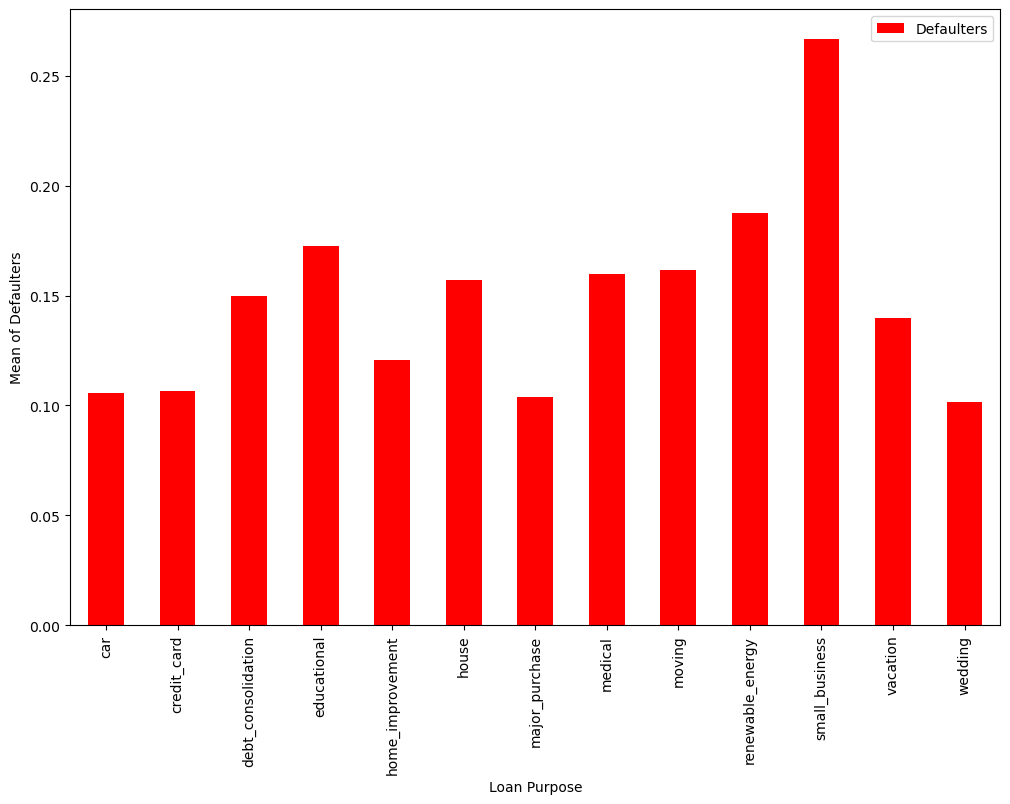

In [56]:
# Plot Loan Purpose to see Default rate by Loan Purpose
default_rate_by_purpose_plot = default_rate_by_purpose.plot(kind='bar', figsize=(12, 8), rot=90,color='r')
default_rate_by_purpose_plot.set_xlabel("Loan Purpose")
default_rate_by_purpose_plot.set_ylabel("Mean of Defaulters")
plt.legend().get_texts()[0].set_text('Defaulters')
plt.show()

<strong>Analysis Result:</strong> The default rate is highest for loans acquired for <strong>small businesses</strong> and lowest for those taken for <strong>weddings</strong>.
<br /><br />
<strong>Recommendation:</strong> Providing loans to support small businesses entails significant risks.

=====================================================================================================================

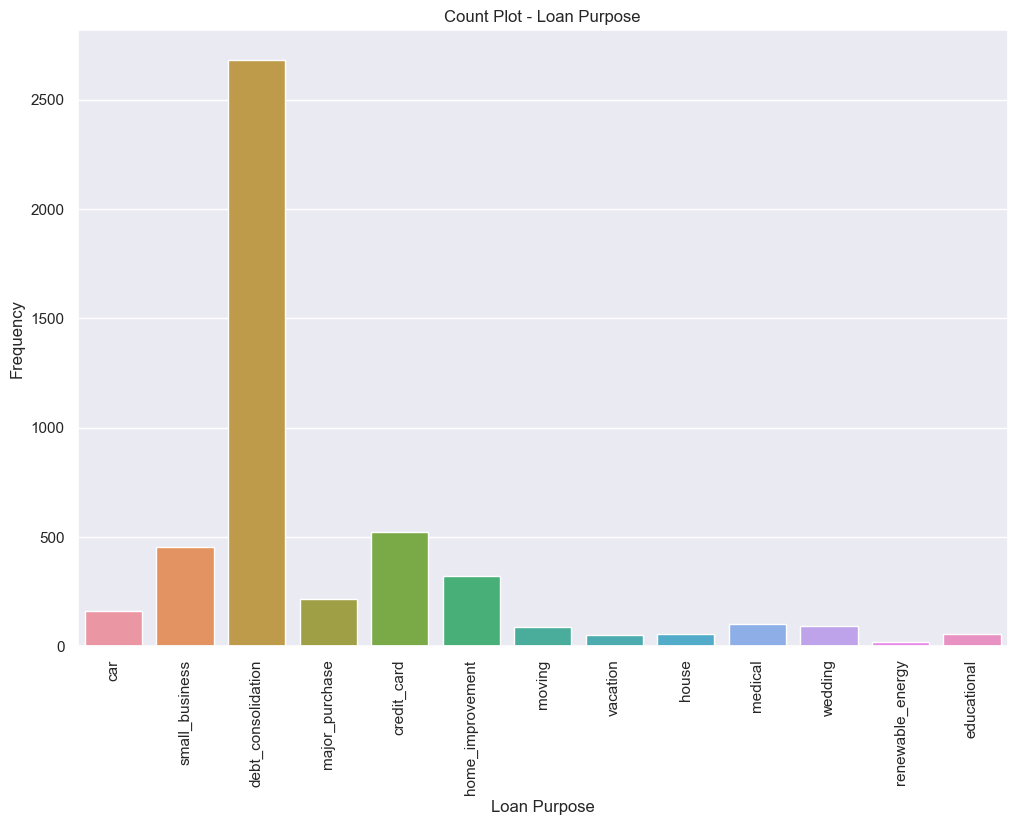

In [154]:
# Plot to show the frequency of loan Purpose only for 'Charged-Off' data
fig= plt.subplots(figsize=(12, 8))
purpose_countplot = sns.countplot(charged_off_data, x="purpose")
purpose_countplot.set_title("Count Plot - Loan Purpose")
purpose_countplot.set_xlabel("Loan Purpose")
purpose_countplot.set_ylabel("Frequency")
plt.xticks(rotation=90) 
plt.show()

<strong>Analysis Result:</strong> However, upon analyzing exclusively the 'Charged-Off' data, the default rate is highest for loans acquired for <strong>Debt Consolidation</strong> and lowest for those taken for <strong>Renewable energy</strong>.
<br /><br />
<strong>Recommendation:</strong> Providing loans to support Debt Consolidation entails significant risks.

=====================================================================================================================

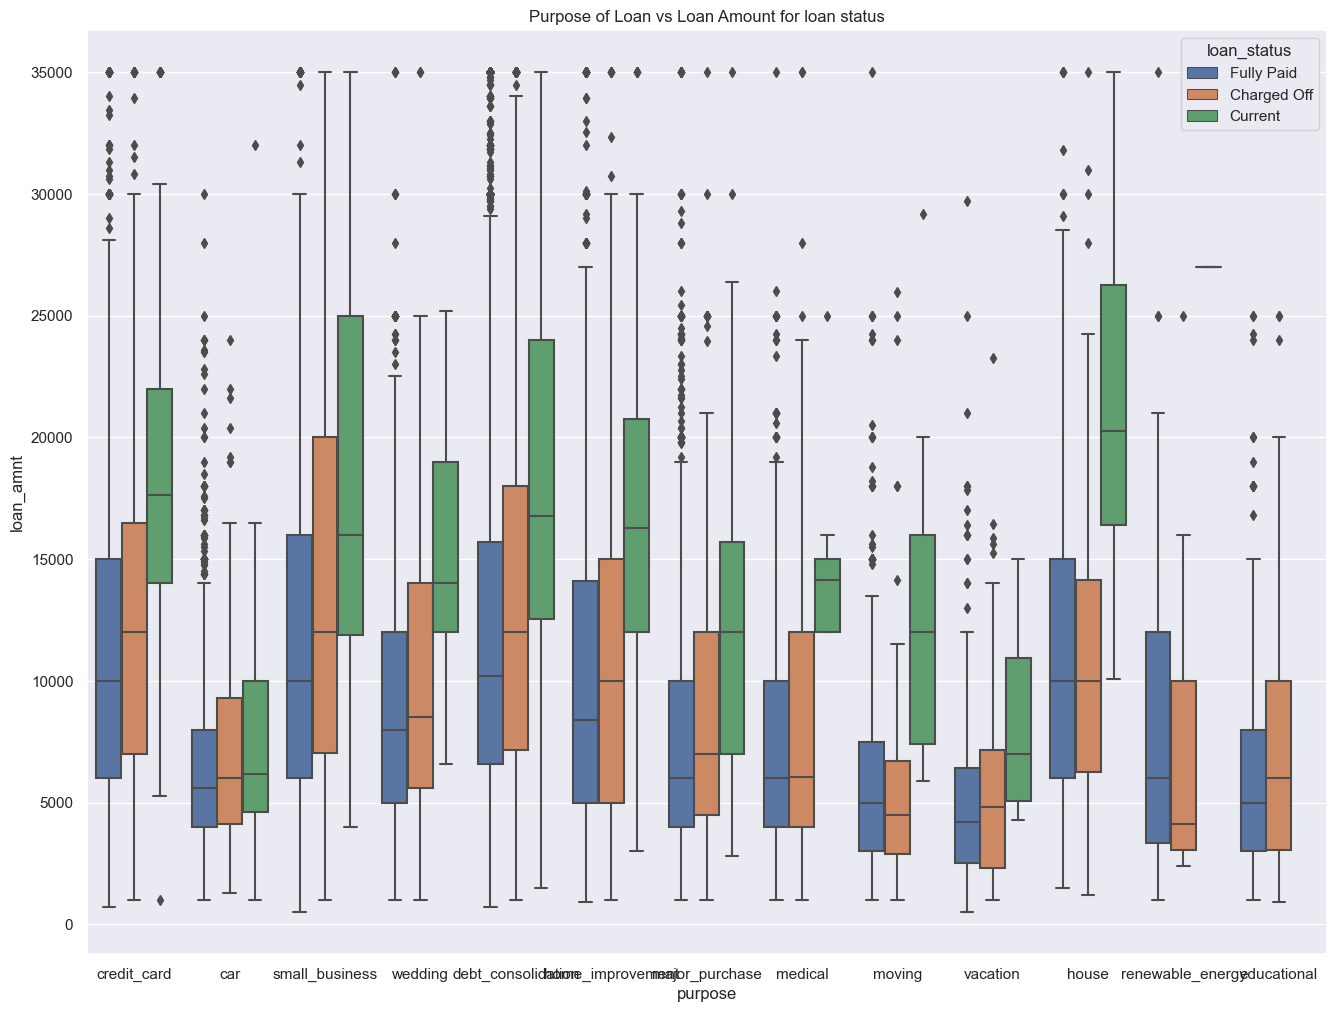

In [102]:
# Purpose of Loan vs Loan Amount for loan status
plt.figure(figsize=(16,12))
sns.boxplot(data =loan_data, x='purpose', y='loan_amnt', hue ='loan_status')
plt.title('Purpose of Loan vs Loan Amount for loan status')
plt.show()

In [57]:
# Reading 'loan_amnt', 'int_rate' and 'annual_inc' together to find the correlation between them and ploting on hearmap
# Create a new DataFrame object
df_loan_amnt_int_rate_annual_inc= pd.DataFrame(charged_off_data, columns=['loan_amnt', 'int_rate', 'annual_inc'])

In [58]:
# Finding the correlation between 'loan_amnt', 'int_rate' and 'annual_inc' 
df_loan_amnt_int_rate_annual_inc.corr()

,loan_amnt,int_rate,annual_inc
loan_amnt,1.000000,0.350234,0.459726
int_rate,0.350234,1.000000,0.169249
annual_inc,0.459726,0.169249,1.000000


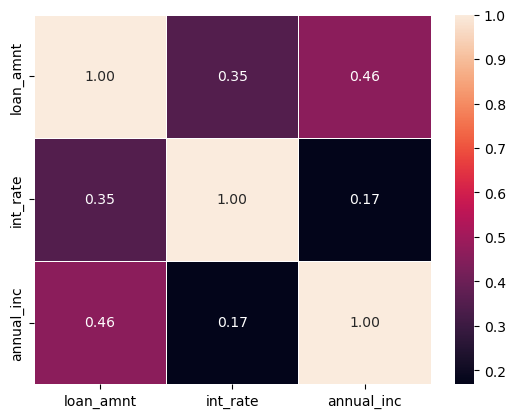

In [59]:
# Ploting 'loan_amnt', 'int_rate' and 'annual_inc'  on heat map
sns.heatmap(data=df_loan_amnt_int_rate_annual_inc.corr(),annot=True,fmt=".2f", linewidth=.5)
plt.show()

<strong>Analysis Result</strong> - The above chart shows that the <strong>loan_amnt</strong>, <strong>int_rate</strong> and <strong>annual_inc</strong> are related together ie have <strong>positive correlation</strong>.

=====================================================================================================================

In [60]:
# Reading 'Debt to Income' and analysis it
loan_data['dti'].describe()

count    34045.000000
mean        13.604299
std          6.629124
min          0.000000
25%          8.570000
50%         13.730000
75%         18.840000
max         29.990000
Name: dti, dtype: float64

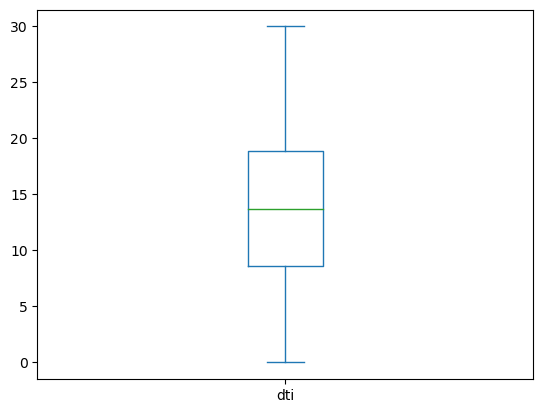

In [61]:
# Ploting 'Debt to Income'
loan_data['dti'].plot.box()
plt.show()

In [62]:
# Putting debt to income ratio in buckets
loan_data['dti_range'] = pd.cut(loan_data['dti'], bins = 6, labels = ['0-5', '5-10', '10-15', '15-20', '20-25', '25-30'])
loan_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies,has_defaulted,issue_year,issue_month,income_range,int_rate_range,installment_range,dti_range
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,...,NaN,May-16,0.0,0,2011,12,20k-40k,10-15,100-250,25-30
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,...,NaN,Sep-13,0.0,1,2011,12,20k-40k,15-20,100-250,0-5
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,...,NaN,May-16,0.0,0,2011,12,less than 20k,15-20,100-250,5-10
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,...,NaN,Jan-16,0.0,0,2011,12,20k-40k,5-10,100-250,10-15
6,7000,7000,7000.0,60 months,15.96,170.08,C,C5,Southern Star Photography,8 years,...,NaN,May-16,0.0,0,2011,12,40k-60k,15-20,100-250,20-25


In [63]:
# Creating data set to map debt to income ration and default rate
dti_range_data = pd.pivot_table(data = loan_data, values='has_defaulted', index=['dti_range'], aggfunc=np.mean)
dti_range_data.head()

,has_defaulted
dti_range,
0-5,0.125806
5-10,0.123403
10-15,0.140343
15-20,0.151587
20-25,0.162224


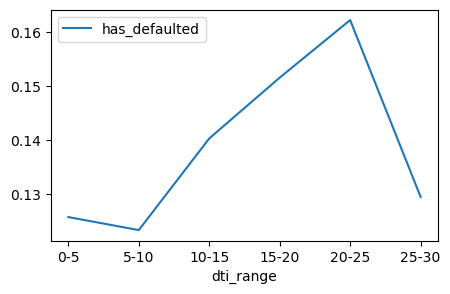

In [64]:
# Plotting line chart to analyze impact of debt to income ratio on default rate 
dti_range_data.plot(kind='line', figsize=(5, 3), rot=0)
plt.show()

<strong>Analysis Result</strong> - From above line chart we get to know that with increasing debt to income ratio the default rate also increases upto range <strong>20-25</strong> but drops after that and most drop range is at <strong>25-30</strong>. This drop might be explained with a reason that people with very high debt to income ratio dont want to increase their debt further so they mostly pay off thier loans.
<br /><br />
<strong>Recommendation:</strong> Granting loans to individuals with a significantly elevated debt-to-income ratio might involve lower risks.

=====================================================================================================================

In [65]:
# Reading Job 'grade' and analysis it
loan_data['grade'].head()

0    B
1    C
2    C
5    A
6    C
Name: grade, dtype: object

In [66]:
# Grouping Job Grade and calculating mean of defaulters
default_rate_by_job_grade = loan_data.groupby('grade').agg(has_defaulted=pd.NamedAgg(column="has_defaulted",aggfunc='mean'))
default_rate_by_job_grade.head()

,has_defaulted
grade,
A,0.058871
B,0.118748
C,0.167412
D,0.210515
E,0.250000


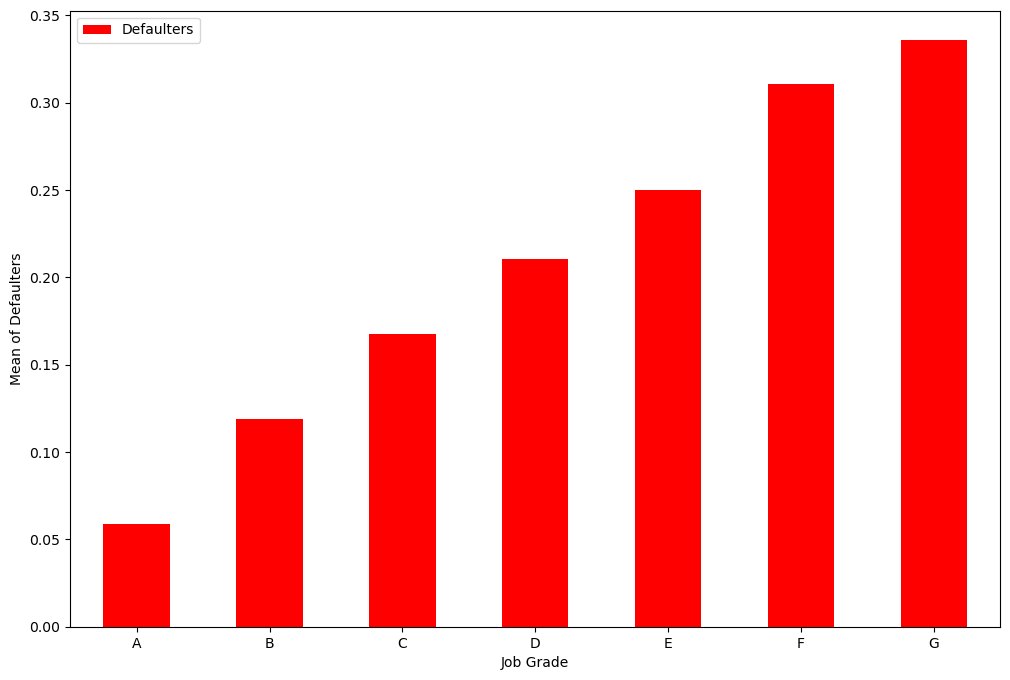

In [67]:
# Plot Job Grade to see Default rate by Job Grade
default_rate_by_job_grade_plot = default_rate_by_job_grade.plot(kind='bar', figsize=(12, 8), rot=0,color='r')
default_rate_by_job_grade_plot.set_xlabel("Job Grade")
default_rate_by_job_grade_plot.set_ylabel("Mean of Defaulters")
plt.legend().get_texts()[0].set_text('Defaulters')
plt.show()

<strong>Analysis Result</strong> - The above chart shows that the majority of individuals who defaulted on their payments belong to job <strong>grade G</strong>.<br /><br />
<strong>Recommendation:</strong> Granting loans to individuals with a job <strong>grade G</strong> might involve more risks.

=====================================================================================================================

In [81]:
# Plot to show the frequency of Job Grade only for 'Charged-Off' data
fig = px.pie(charged_off_data,names='grade', title='Percent of loan by Job Grade',hole=0)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

<strong>Analysis Result:</strong> However, Upon examining only the 'Charged-Off' data, we found that a small proportion of individuals who defaulted on their payments belong to job <strong>grade G</strong>.
<br /><br />
<strong>Recommendation:</strong> Granting loans to individuals with a job <strong>grade G</strong> might involve less risks.

In [69]:
# Reading address 'state' and analysis it
loan_data['addr_state'].head()

0    AZ
1    GA
2    IL
5    AZ
6    NC
Name: addr_state, dtype: object

In [70]:
# Grouping State and calculating mean of defaulters
default_rate_by_state = loan_data.groupby('addr_state').agg(has_defaulted=pd.NamedAgg(column="has_defaulted",aggfunc='mean'))
default_rate_by_state.head()

,has_defaulted
addr_state,
AK,0.194030
AL,0.116625
AR,0.096774
AZ,0.140026
CA,0.158678


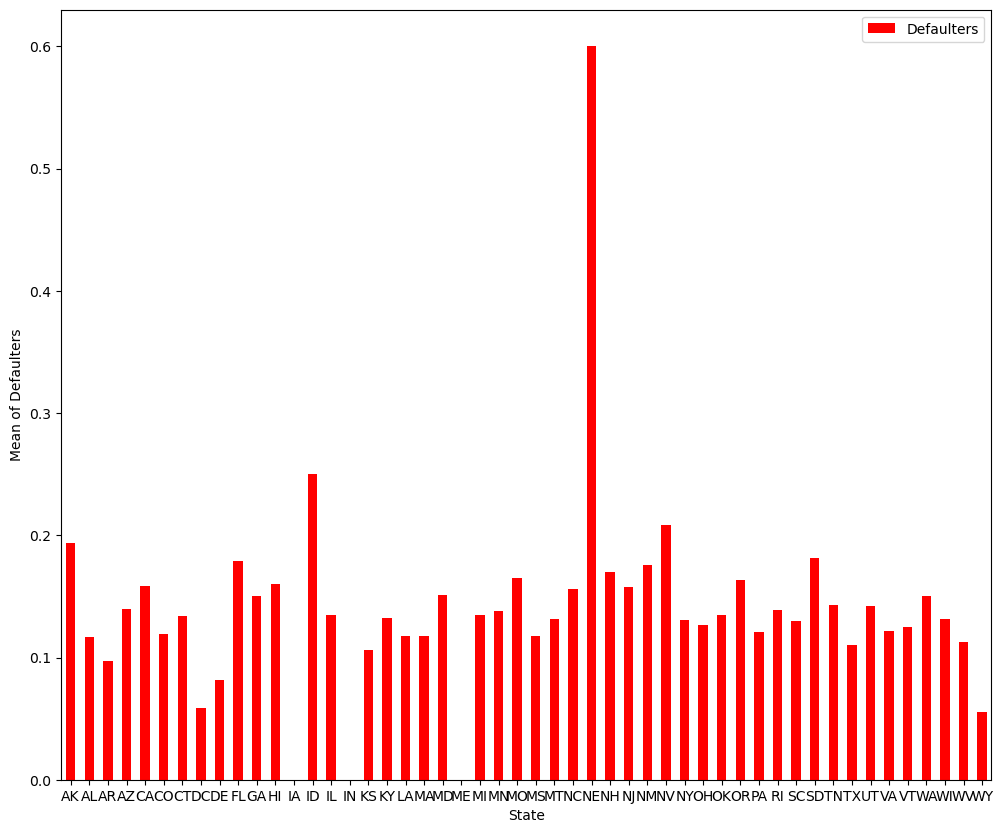

In [71]:
# Plot State to see Default rate by State
default_rate_by_state_plot = default_rate_by_state.plot(kind='bar', figsize=(12, 10), rot=0,color='r')
default_rate_by_state_plot.set_xlabel("State")
default_rate_by_state_plot.set_ylabel("Mean of Defaulters")
plt.legend().get_texts()[0].set_text('Defaulters')
plt.show()

<strong>Analysis Result</strong> - The above chart shows that the majority of individuals who defaulted on their payments belong to state <strong>NE</strong>.<br /><br />
<strong>Recommendation:</strong> Granting loans to individuals who belong to state <strong>NE</strong> might involve more risks.

=====================================================================================================================

In [72]:
# Further analys on State and Amount columns, finding whic state has most loan amount sanctioned
state_vs_loan_amount = charged_off_data.groupby('addr_state').agg(total_loan_amount=pd.NamedAgg(column="loan_amnt",aggfunc='sum'))
state_vs_loan_amount.head()

,total_loan_amount
addr_state,
AK,187875
AL,606675
AR,211250
AZ,1277575
CA,11757475


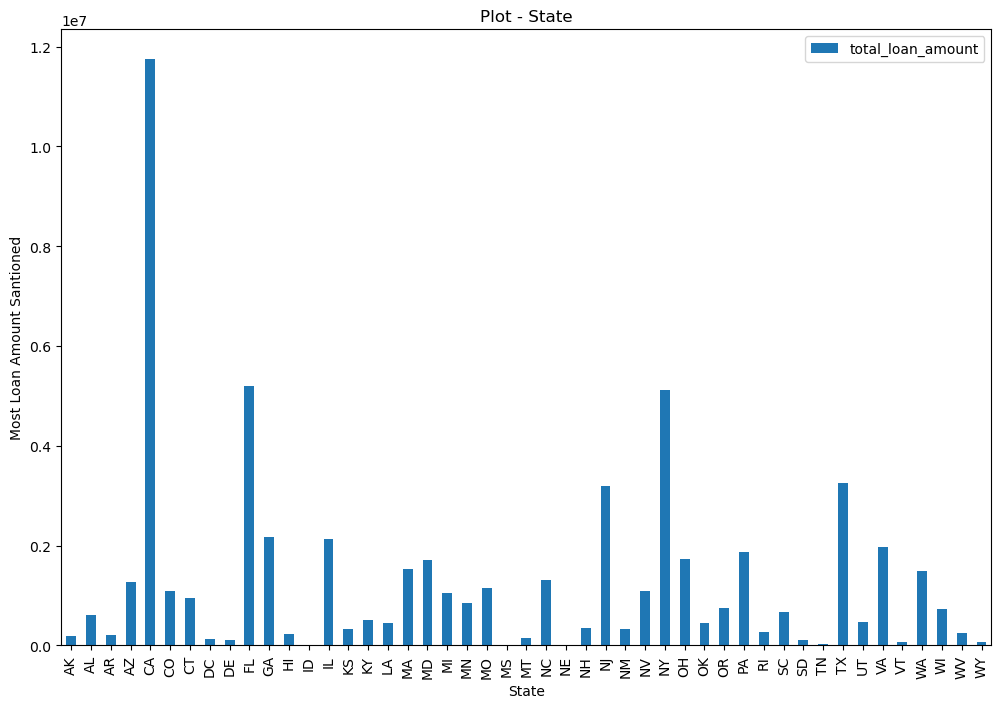

In [73]:
# Plot State vs Total Loan Santioned to each state
state_vs_loan_amount_plot =  state_vs_loan_amount.plot(kind='bar', figsize=(12, 8))
state_vs_loan_amount_plot.set_title("Plot - State")
state_vs_loan_amount_plot.set_xlabel("State")
state_vs_loan_amount_plot.set_ylabel("Most Loan Amount Santioned")
plt.show()

<strong>Analysis Result</strong> - The chart above indicates that most people who defaulted took out larger loans in the state of CA.<br /><br />
<strong>Recommendation:</strong> Lending loans in the state of CA necessitates increased precautions.


In [82]:
# Read column loan 'emp_length' and analysis it
charged_off_data['emp_length'].head()

1      < 1 year
8       4 years
12     < 1 year
21    10+ years
24       1 year
Name: emp_length, dtype: object

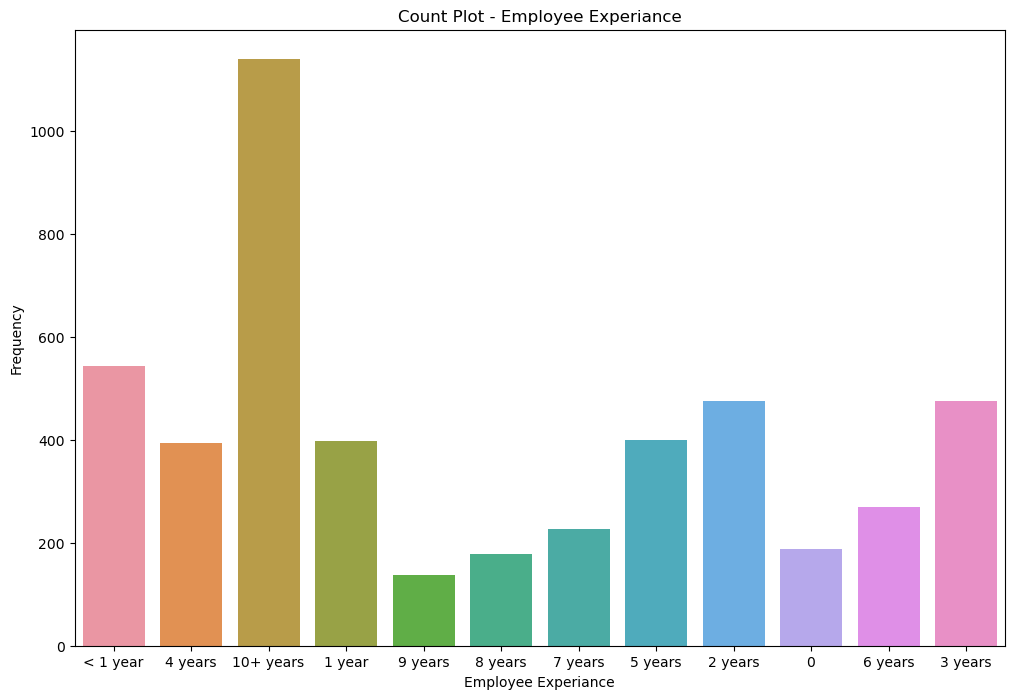

In [84]:
# Plot to show the frequency of Employee Experiance only for 'Charged-Off' data
fig = plt.subplots(figsize=(12, 8))
emp_length_countplot = sns.countplot(charged_off_data, x="emp_length")
emp_length_countplot.set_title("Count Plot - Employee Experiance")
emp_length_countplot.set_xlabel("Employee Experiance")
emp_length_countplot.set_ylabel("Frequency")
plt.show()

<strong>Analysis Result:</strong> The chart above shows that most people who failed to make payments have more than a <strong>10+ years</strong> of experience.
<br /><br />
<strong>Recommendation:</strong> Providing loans to individuals with more experience could potentially increase the associated risks.

=====================================================================================================================

In [75]:
# Read column loan 'issue_d' and analysis it
loan_data['issue_d'].head()

0   2011-12-01
1   2011-12-01
2   2011-12-01
5   2011-12-01
6   2011-12-01
Name: issue_d, dtype: datetime64[ns]

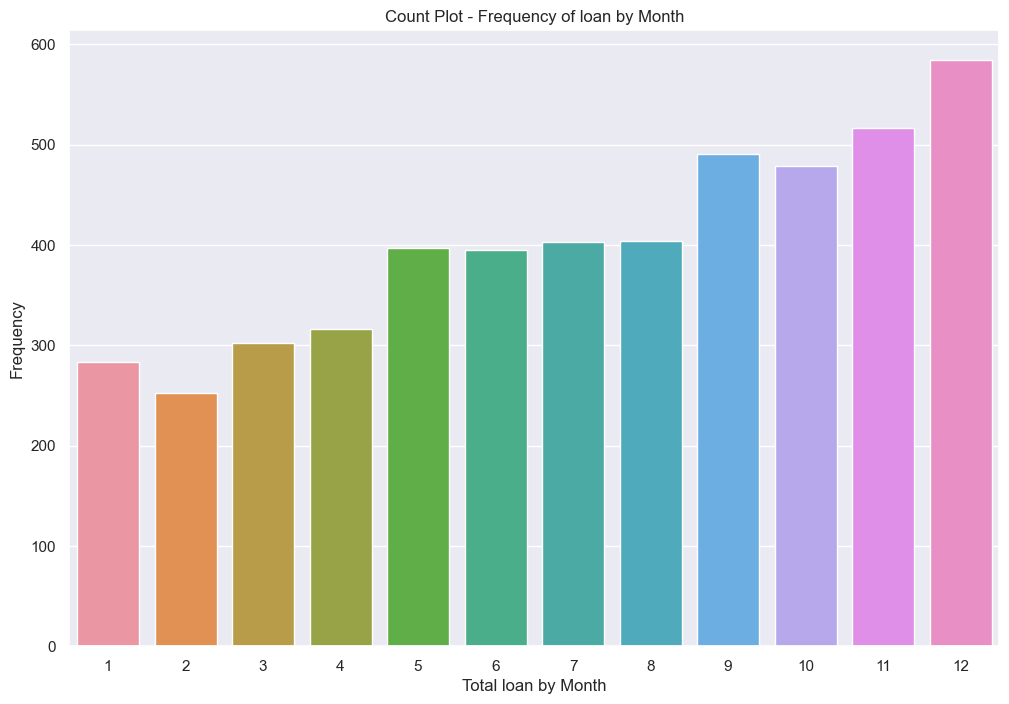

In [132]:
# Plot to show the frequency of loan by issued 'Month'
fig = plt.subplots(figsize=(12, 8))
issue_month_countplot = sns.countplot(charged_off_data, x="issue_month")
issue_month_countplot.set_title("Count Plot - Frequency of loan by Month")
issue_month_countplot.set_xlabel("Total loan by Month")
issue_month_countplot.set_ylabel("Frequency")
plt.show()

<strong>Analysis Result</strong> - The above chart shows that a majority of defaulted loans were approved in the month of <strong>December</strong>.

<strong>Recommendation:</strong> The decrease in application scrutiny at the year-end might be attributed to financial constraints. This situation can be enhanced through improvements.

=====================================================================================================================

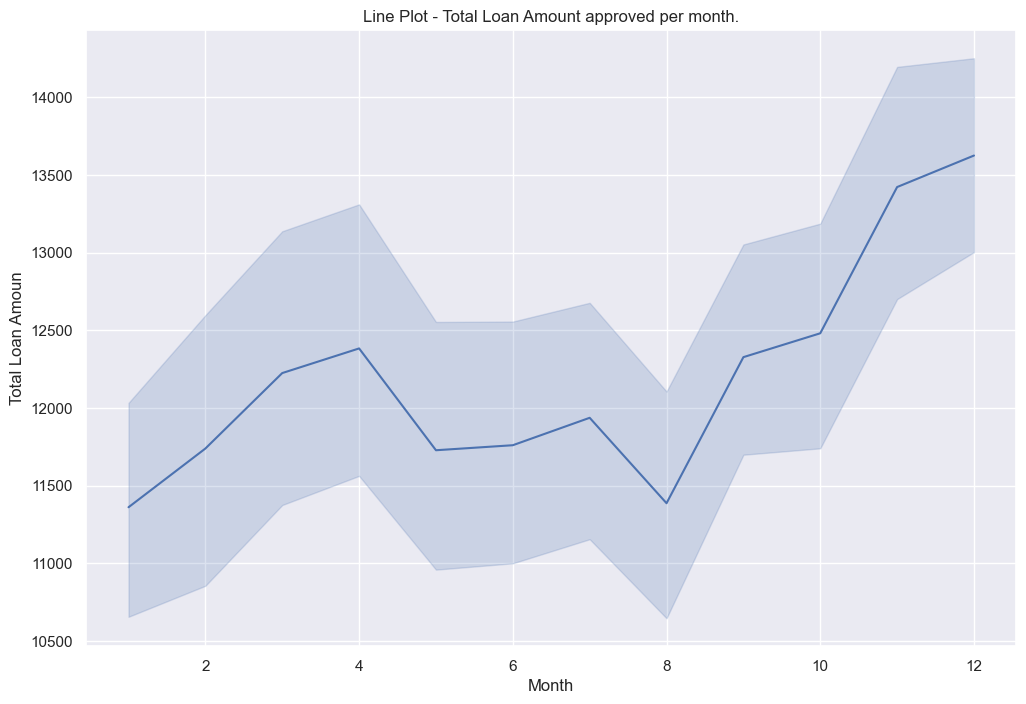

In [133]:
# Line Plot - Total Loan Amount approved per month.
fig = plt.subplots(figsize=(12, 8))
issue_month_countplot = sns.lineplot(charged_off_data, x="issue_month", y="loan_amnt")
issue_month_countplot.set_title("Line Plot - Total Loan Amount approved per month")
issue_month_countplot.set_xlabel("Month")
issue_month_countplot.set_ylabel("Total Loan Amount")
plt.show()

<strong>Analysis Result:</strong> The chart above confirms that the majority of defaulted loan amounts were disbursed in <strong>December</strong>.

<strong>Recommendation:</strong> The decrease in application scrutiny at the year-end might be attributed to financial constraints. This situation can be enhanced through improvements.


=====================================================================================================================

In [134]:
# Plot to show the frequency of loan by Issue 'Year'
fig = px.pie(charged_off_data,names='issue_year', title='Percent of loan by Year',hole=0)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

<strong>Analysis Result</strong> - The above chart shows that a majority of defaulted loans were approved in the year of <strong>2011</strong>.


=====================================================================================================================

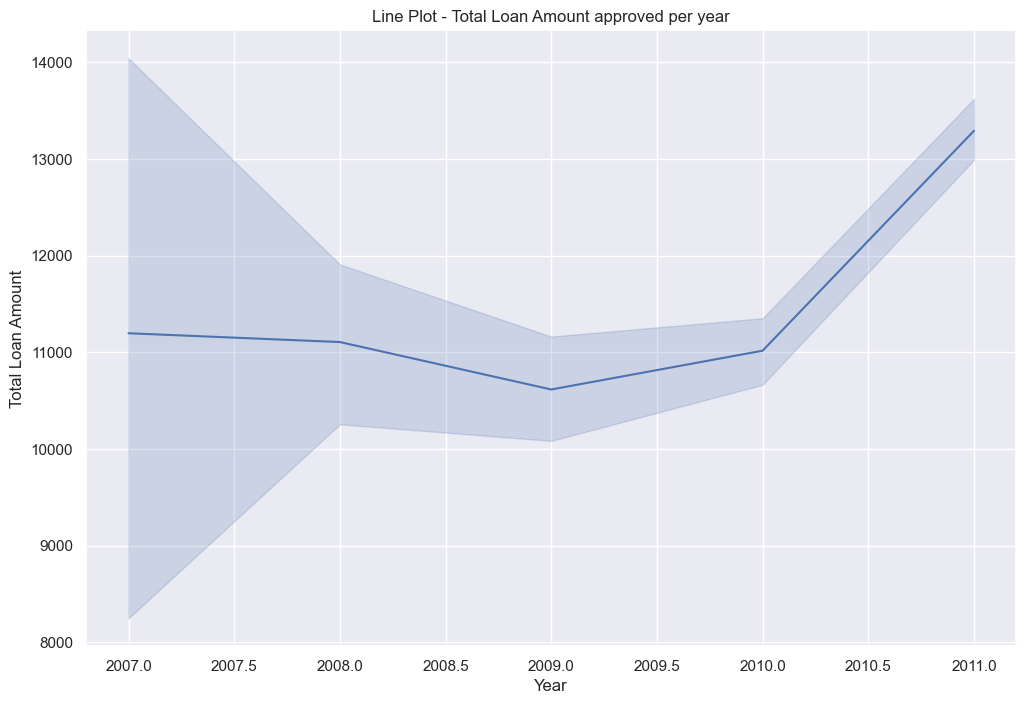

In [135]:
# Line Plot - Total Loan Amount approved per year
fig = plt.subplots(figsize=(12, 8))
issue_year_countplot = sns.lineplot(charged_off_data, x="issue_year", y="loan_amnt")
issue_year_countplot.set_title("Line Plot - Total Loan Amount approved per year")
issue_year_countplot.set_xlabel("Year")
issue_year_countplot.set_ylabel("Total Loan Amount")
plt.show()

<strong>Analysis Result:</strong> The chart above confirms that the majority of defaulted loan amounts were disbursed in <strong>2011</strong>.


=========================================================================================================================


### Conclusions:
<li><strong>83.1%</strong> individuals have successfully repaid their loans, <strong>2.76%</strong> are current loans and <strong>14.2%</strong> loans have been declared as charged off.</li><br />
<li>Majority of loans fall within the income range of <strong>40000 to 80000</strong>.</li><br />
<li>As income rises, the rate of loan defaults decreases.</li><br />
<li>Significant portion of defaulters opted for a <strong>60 months</strong> loan term. But when we studied only <strong>'Charged-Off'</strong> data then found that a significant portion of defaulters opted for a <strong>36 months</strong> loan term.</li><br />
<li>There is no evident connection between owning a home and the rate of defaults on loans. But when we studied only <strong>'Charged-Off'</strong> data then found that a significant portion of individuals who have defaulted on their payments reside in <strong>rented</strong> accommodations.</li><br />
<li>The default rate is directly related to the interest rate. In other words, most individuals who failed to repay their loans had borrowed money at interest rates exceeding 20%. However, upon analyzing exclusively the <strong>'Charged-Off'</strong> data, we discovered that a notable number of people who failed to meet their payment obligations had taken out loans with a ratio ranging from <strong>10-15%</strong>.</li><br />
<li>Loans with installment amounts between <strong>500 and 750</strong> exhibit the highest rate of defaults. However, this information doesn't provide any useful insights on whether to approve or deny a loan application.</li><br />
<li>The default rate is highest for loans acquired for <strong>small businesses</strong> and lowest for those taken for <strong>weddings</strong>. However, upon analyzing exclusively the 'Charged-Off' data, the default rate is highest for loans acquired for <strong>Debt Consolidation</strong> and lowest for those taken for <strong>Renewable energy</strong>.</li><br />
<li><strong>loan_amnt</strong>, <strong>int_rate</strong> and <strong>annual_inc</strong> are related together ie have <strong>positive correlation</strong>.</li><br />
<li>Increasing debt to income ratio the default rate also increases upto range <strong>20-25</strong> but drops after that and most drop range is at <strong>25-30</strong>. This drop might be explained with a reason that people with very high debt to income ratio dont want to increase their debt further so they mostly pay off thier loans.</li><br />
<li>Majority of individuals who defaulted on their payments belong to job <strong>grade G</strong>.</li><br />
<li>However, Upon examining only the 'Charged-Off' data, we found that a small proportion of individuals who defaulted on their payments belong to job <strong>grade G</strong>.</li><br />
<li>The above chart shows that the majority of individuals who defaulted on their payments belong to state <strong>NE</strong>.</li><br />
<li>The chart above indicates that most people who defaulted took out larger loans in the state of CA.</li><br />
<li>The chart above shows that most people who failed to make payments have more than a <strong>10+ years</strong> of experience.</li><br />
<li>The above chart shows that a majority of defaulted loans were approved in the month of <strong>December</strong>.</li><br />
<li> The above chart shows that a majority of defaulted loans were approved in the year of <strong>2011</strong>.</li>